<a href="https://colab.research.google.com/github/Akankshakhamkar1/Adventure_works_Project/blob/main/P_326_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving New_Copy of energy_production (1) 2.xlsx to New_Copy of energy_production (1) 2 (1).xlsx


In [ ]:
xlsx_file='New_Copy of energy_production (1) 2.xlsx'
csv_file='New_Copy_of_energy_production.csv'
df=pd.read_excel(xlsx_file)
df.to_csv(csv_file, index=False)
print(f'Conversion complete.CSV files saved sd {csv_file}')

Conversion complete.CSV files saved sd New_Copy_of_energy_production.csv


In [ ]:
data=pd.read_csv('New_Copy_of_energy_production.csv')
data.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


## **Data Preprocessing**

In [ ]:
data.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [ ]:
data.shape

(9568, 5)

In [ ]:
# Checking information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# Checking the missing values
data.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [ ]:
data.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# Convert the dictionary into DataFrame
data1=pd.DataFrame(data)
data1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
min_value = data1.min()
max_value = data1.max()

print(f'Minimum values:\n{min_value}\n\nMaximum values:\n{max_value}')


Minimum values:
temperature            1.81
exhaust_vacuum        25.36
amb_pressure         992.89
r_humidity            25.56
energy_production    420.26
dtype: float64

Maximum values:
temperature            37.11
exhaust_vacuum         81.56
amb_pressure         1033.30
r_humidity            100.16
energy_production     495.76
dtype: float64


### **EDA**

In [ ]:
correlation =data1.corr()
correlation

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


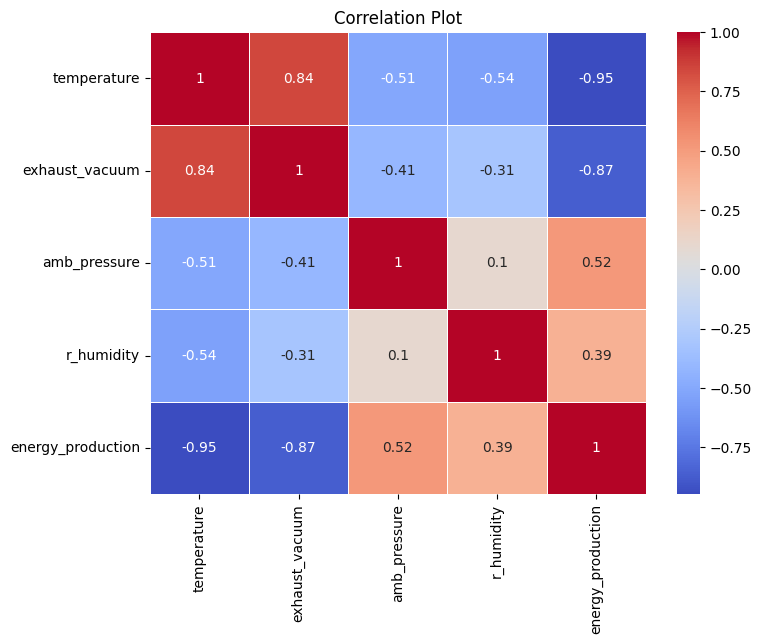

In [ ]:
# The correlation matrix plot using heatmap
corr_matrix = data1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show()

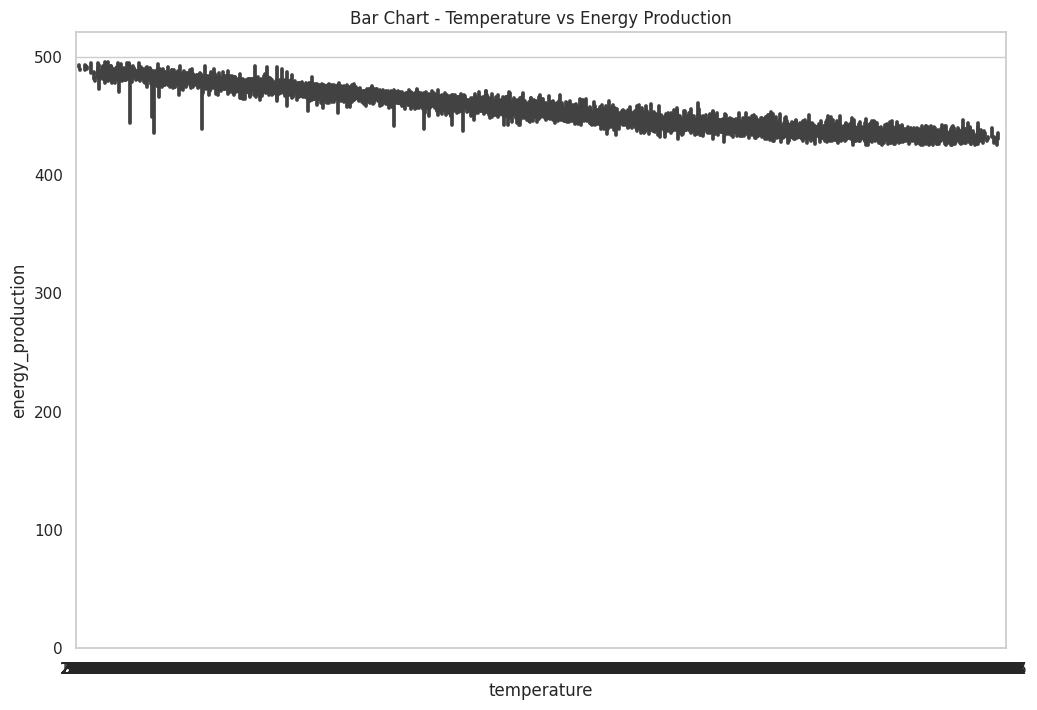

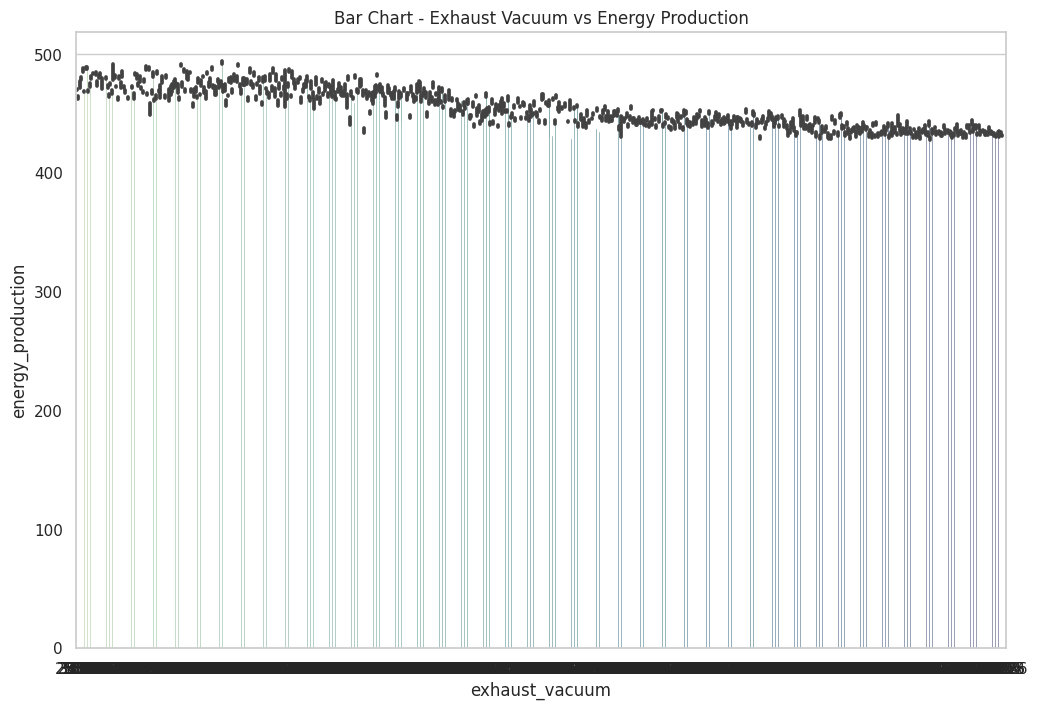

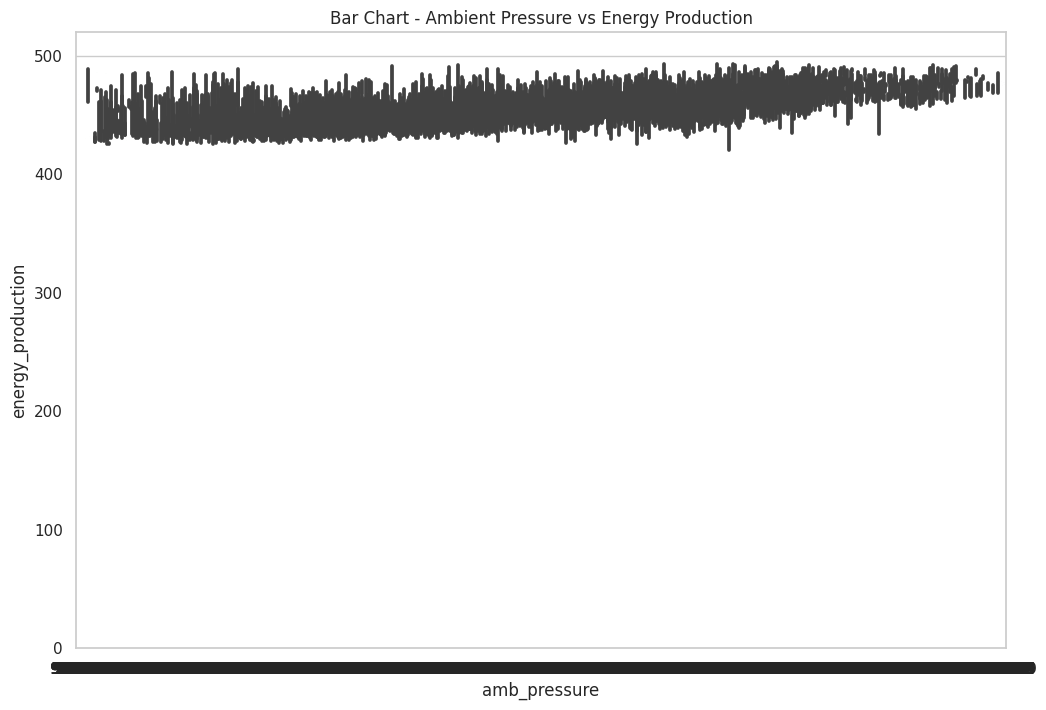

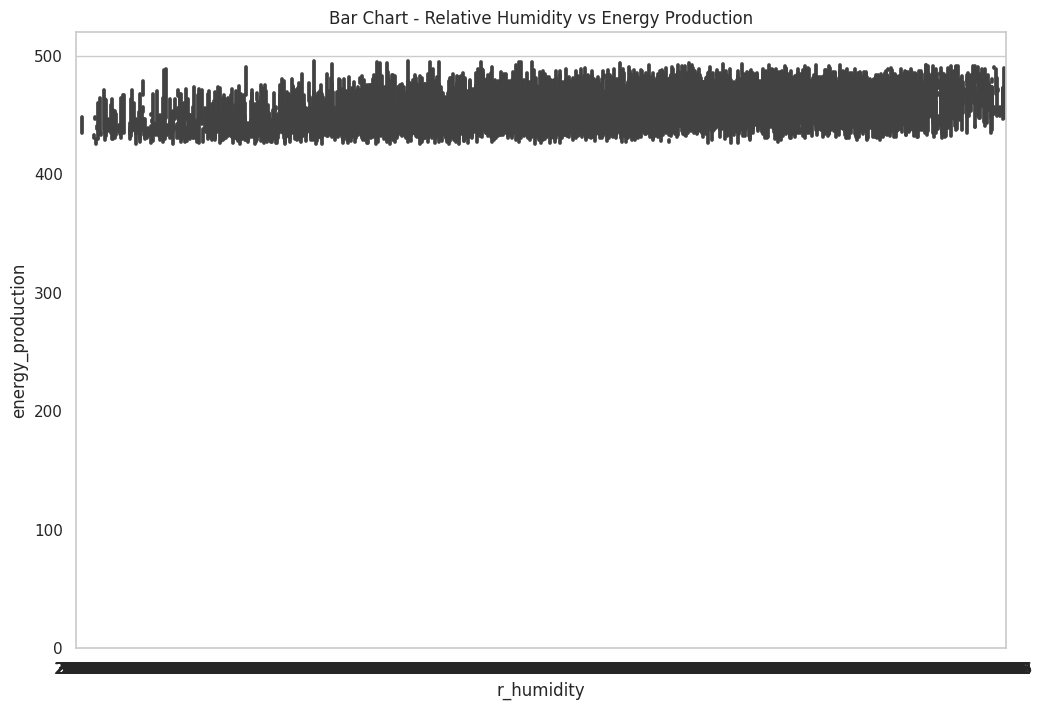

In [ ]:
plt.figure(figsize=(12, 8))

# Create bar charts for each variable
sns.barplot(x='temperature', y='energy_production', data=data1, palette='crest')
plt.title('Bar Chart - Temperature vs Energy Production')

plt.figure(figsize=(12, 8))
sns.barplot(x='exhaust_vacuum', y='energy_production', data=data1, palette='crest')
plt.title('Bar Chart - Exhaust Vacuum vs Energy Production')

plt.figure(figsize=(12, 8))
sns.barplot(x='amb_pressure', y='energy_production', data=data1, palette='crest')
plt.title('Bar Chart - Ambient Pressure vs Energy Production')

plt.figure(figsize=(12, 8))
sns.barplot(x='r_humidity', y='energy_production', data=data1, palette='crest')
plt.title('Bar Chart - Relative Humidity vs Energy Production')


plt.show()


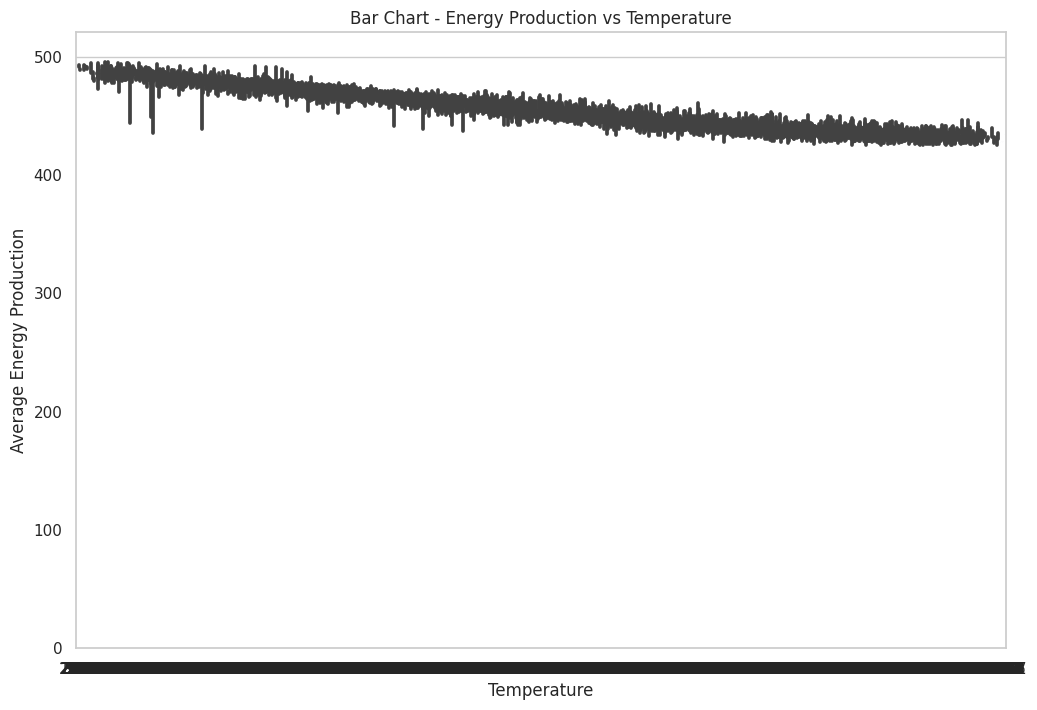

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='temperature', y='energy_production', data=data1, palette='crest')
plt.title('Bar Chart - Energy Production vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Energy Production')
plt.show()


<Figure size 1200x1000 with 0 Axes>

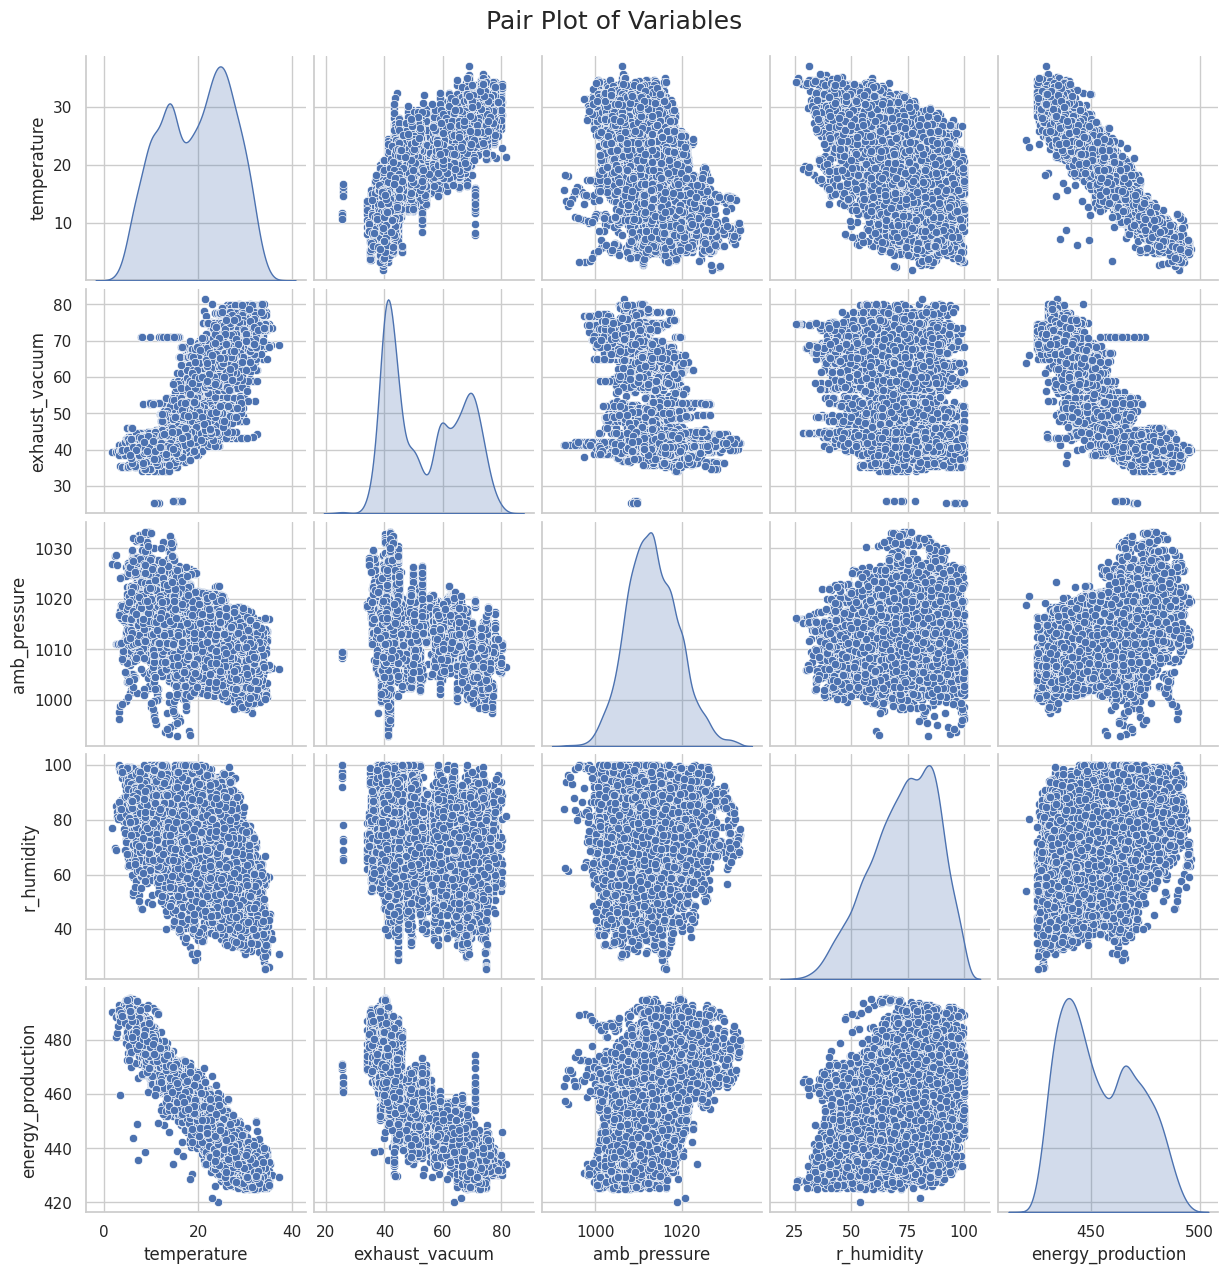

In [ ]:
#correlation plot
sns.set_palette("husl")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(data1, diag_kind='kde', markers='o')
pair_plot.fig.suptitle('Pair Plot of Variables', y=1.02, size=18)
plt.show()

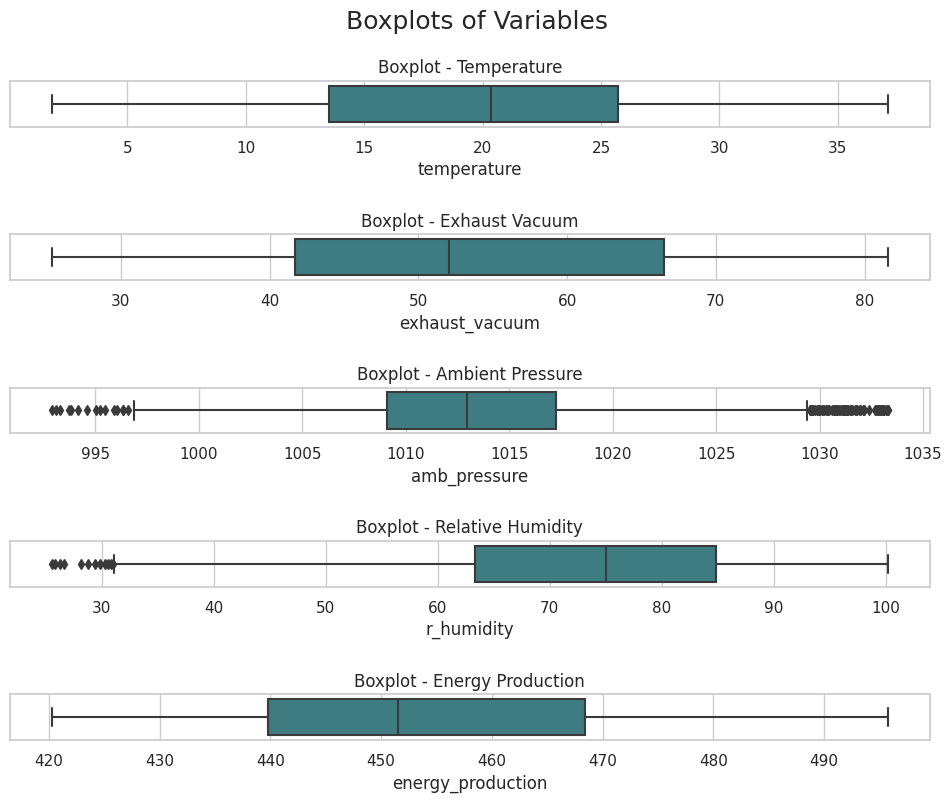

In [ ]:
#outlier detection using box plot
outlier = data1.copy()

fig, axes = plt.subplots(5, 1, figsize=(10, 8), sharex=False, sharey=False)

sns.boxplot(x='temperature', data=outlier, palette='crest', ax=axes[0])
axes[0].set_title('Boxplot - Temperature')

sns.boxplot(x='exhaust_vacuum', data=outlier, palette='crest', ax=axes[1])
axes[1].set_title('Boxplot - Exhaust Vacuum')

sns.boxplot(x='amb_pressure', data=outlier, palette='crest', ax=axes[2])
axes[2].set_title('Boxplot - Ambient Pressure')

sns.boxplot(x='r_humidity', data=outlier, palette='crest', ax=axes[3])
axes[3].set_title('Boxplot - Relative Humidity')

sns.boxplot(x='energy_production', data=outlier, palette='crest', ax=axes[4])
axes[4].set_title('Boxplot - Energy Production')

plt.tight_layout(pad=2.0)
plt.suptitle('Boxplots of Variables', y=1.02, size=18)
plt.show()


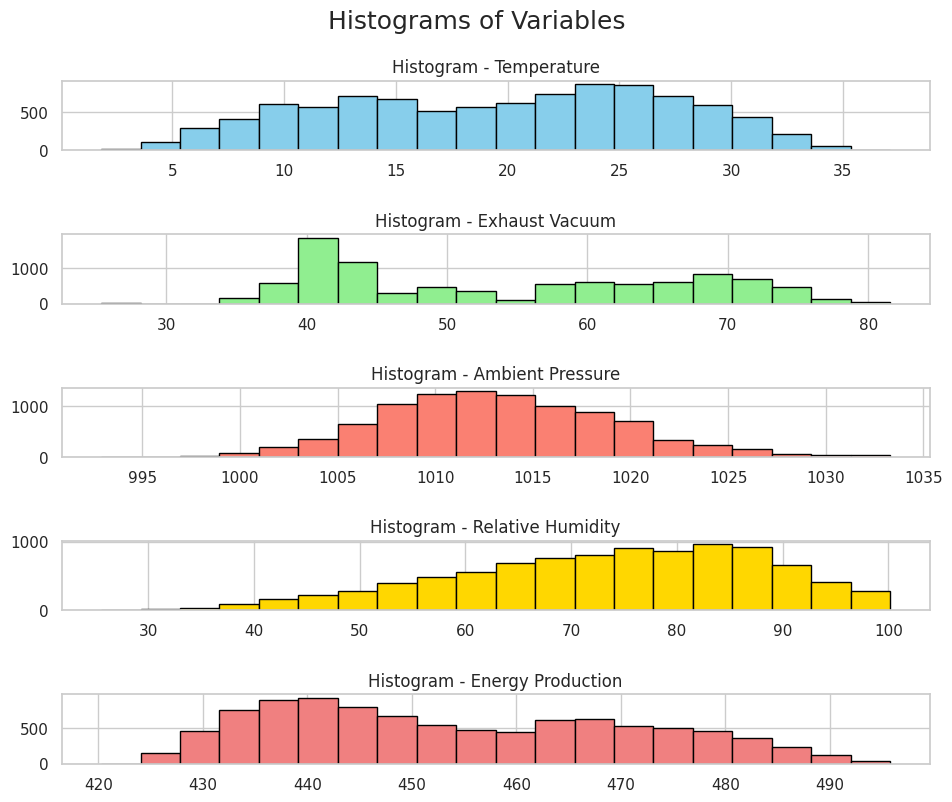

In [ ]:
#outlier detection using histogram plot

fig, axes = plt.subplots(5, 1, figsize=(10, 8), sharex=False, sharey=False)
outlier['temperature'].hist(ax=axes[0], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram - Temperature')

outlier['exhaust_vacuum'].hist(ax=axes[1], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram - Exhaust Vacuum')

outlier['amb_pressure'].hist(ax=axes[2], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Histogram - Ambient Pressure')

outlier['r_humidity'].hist(ax=axes[3], bins=20, color='gold', edgecolor='black')
axes[3].set_title('Histogram - Relative Humidity')

outlier['energy_production'].hist(ax=axes[4], bins=20, color='lightcoral', edgecolor='black')
axes[4].set_title('Histogram - Energy Production')

plt.tight_layout(pad=2.0)
plt.suptitle('Histograms of Variables', y=1.02, size=18)
plt.show()


In [ ]:
import plotly.express as px
fig = px.scatter_3d(data, x='temperature', y='exhaust_vacuum', z='energy_production', color='energy_production')
fig

In [ ]:
import plotly.express as px
fig = px.scatter_3d(data, x='amb_pressure', y='r_humidity', z='energy_production', color='energy_production')
fig